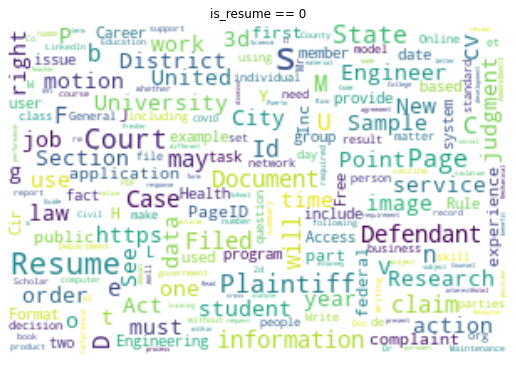

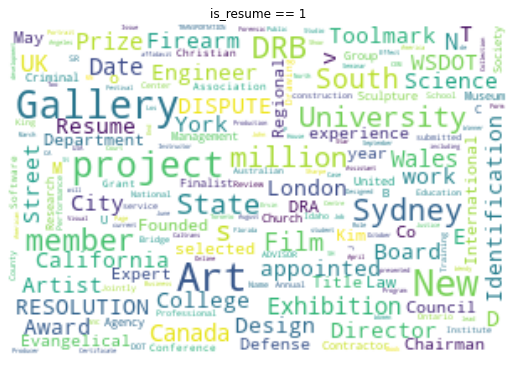

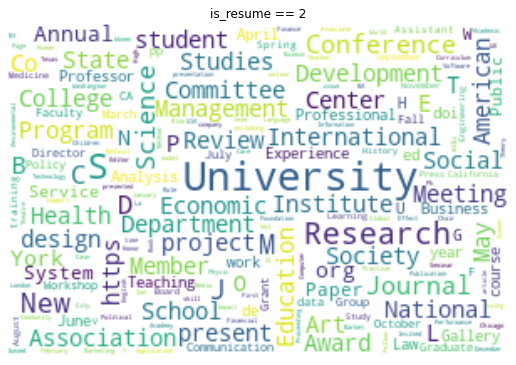

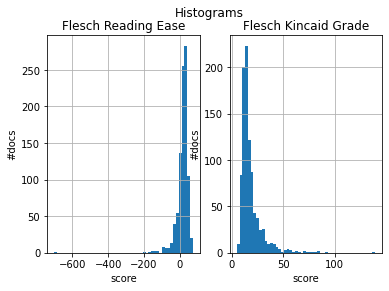

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# !pip install wordcloud
# !pip install textstat
from wordcloud import WordCloud, STOPWORDS
# readability index
from textstat import flesch_reading_ease, flesch_kincaid_grade

if __name__ == "__main__":

    # set the seed for the random number generator for reproducibility of experiments
    np.random.seed(2022)
    plt.ion()
    filename = 'gatherCatalogTexts.xlsx'
    df = pd.read_excel(filename)


    wc = WordCloud(width=300, height=200, random_state=1, max_font_size=24, max_words=500,
                   background_color='white', collocations=False,
                   stopwords=STOPWORDS)

    I = df.is_resume == 2
    text0 = df['text_content'][I].iloc[0]

    for c in [0, 1, 2]:
        I = df.is_resume == c
        text = "\n".join(v for v in df['text_content'][I])

        wordcloud = wc.generate(text)
        plt.figure(figsize=(9, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'is_resume == {c}')
        plt.show()

    # readability index
    fig, axs = plt.subplots(1, 2)
    z1 = df['text_content'][df.is_resume == 2].apply(lambda x: flesch_reading_ease(x))
    z2 = df['text_content'][df.is_resume == 2].apply(lambda x: flesch_kincaid_grade(x))
    z1.hist(bins=50, ax=axs[0])
    z2.hist(bins=50, ax=axs[1])
    axs[0].set_title('Flesch Reading Ease')
    axs[1].set_title('Flesch Kincaid Grade')
    for i in range(2):
        axs[i].set_xlabel('score')
        axs[i].set_ylabel('#docs')
    fig.suptitle('Histograms')
    plt.ioff()
    pass
